# HOMEWORK 2

## PROBLEM 1

###THEORETICAL EXPECTED RETURN TIME TO NODE A

In [ ]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import sys
import random

Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

w = np.sum(Lambda, axis=1)
w_star = np.max(w)
P_BAR = Lambda/w_star 
P_BAR = P_BAR + np.diag(np.ones(len(w))-np.sum(P_BAR,axis=1))

values,vectors = np.linalg.eig(P_BAR.T)
index = np.argmax(values.real)  # index of the leading eigenvalue
pi_bar = vectors[:,index].real  # eigenvector associated to the leading eigenvalue
pi_bar = pi_bar/np.sum(pi_bar)  # normalization
print("pi_bar =", pi_bar)
print("w =", w)
print("Ea[Ta+] = 1/(wa + πa) = ", round(1/(w[1]*pi_bar[1]), 4))

pi_bar = [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]
w = [0.6        1.         1.         1.         0.66666667]
Ea[Ta+] = 1/(wa + πa) =  6.75


###EMPIRICAL EXPECTED RETURN TIME TO NODE A

In [ ]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import sys
import random

Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

node_dict = {'o':0, 'a':1, 'b':2, 'c':3, 'd':4}

w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

n_iter = 100000  # number of times to repeat the simulation
n_steps = 50  # automatic arrest of the simulation over 50 steps
starting_node = 'a'
total_time = 0
cnt = 0

for j in range(n_iter):
  pos = np.zeros(n_steps, dtype=int)  # vector storing the sequence of visited nodes
  pos[0] = node_dict[starting_node]  # starting node 'a' that is associated with 1
  transition_times = np.zeros(n_steps)  # vector storing the times at which nodes in the sequence have been visited
  t_next = -np.log(np.random.rand())/w[node_dict[starting_node]]  # Given node Poisson clock click simulation
  P_cum = np.cumsum(P, axis=1)

  for i in range(1,n_steps):  # Actual simulation of a given particle
    pos[i] = np.argwhere(P_cum[pos[i-1]] > np.random.rand())[0]  # at click jumps to a new node
    transition_times[i] = transition_times[i-1] + t_next  # updates the time

    if pos[i] == pos[0]:  # check if the new node is the starting one
      total_steps = i+1
      simulation_time = transition_times[i]
      break
    t_next = -np.log(np.random.rand())/w[pos[i]]  # if not simulates next click and will jump to a new one in the next iteration
      
  total_time += simulation_time
  cnt += 1
      
print("Average return time: ", round(total_time/cnt, 4), 's')

Average return time:  6.7502 s


### EMPIRICAL EXPECTED HITTING TIME OF D STARTING FROM O

In [ ]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import sys
import random

Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

node_dict = {'o':0, 'a':1, 'b':2, 'c':3, 'd':4}

w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

n_iter = 100000  # number of times to repeat the simulation
n_steps = 50  # automatic arrest over 50 steps
starting_node = 'o'
total_time = 0
cnt = 0

for j in range(n_iter):
  pos = np.zeros(n_steps, dtype=int)  # vector storing the sequence of visited nodes
  pos[0] = node_dict[starting_node]  # starting node 'a' that is associated with 1
  transition_times = np.zeros(n_steps)  # vector storing the times at which nodes in the sequence have been visited
  t_next = -np.log(np.random.rand())/w[node_dict[starting_node]]  # Given node Poisson clock click simulation
  P_cum = np.cumsum(P, axis=1)

  for i in range(1,n_steps):
    pos[i] = np.argwhere(P_cum[pos[i-1]] > np.random.rand())[0]
    transition_times[i] = transition_times[i-1] + t_next
    t_next = -np.log(np.random.rand())/w[pos[i]]
    if pos[i] == 4:
      total_steps = i+1
      simulation_time = transition_times[i]
      # print("Trajectory: ", pos[:total_steps])
      # print("Return time: ", simulation_time)
      break
      
  total_time += simulation_time
  cnt += 1
      
print("Average hitting time of node 'd' from node 'o': ", round(total_time/cnt, 4), 's')

Average hitting time of node 'd' from node 'o':  8.7538 s


---
---

## PROBLEM 2

### A

In [ ]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import sys
import random

Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

node_dict = {'o':0, 'a':1, 'b':2, 'c':3, 'd':4}

w = np.sum(Lambda, axis=1)
P_BAR = Lambda/w_star 
P_BAR = P_BAR + np.diag(np.ones(len(w))-np.sum(P_BAR,axis=1))

n_particles = 100  # number of particles
global_poisson_clock_rate = n_particles
n_steps = 50  # automatic arrest over fixed number of steps
starting_node = 'a'
pos = np.zeros((n_particles, n_steps), dtype=int)  # matrix storing the sequence of visited nodes for each particle
advancement_indexes = np.ones(n_particles, dtype=int)  # keeps track of where the sequence ends in pos array for each particle
particle_has_exited_first = np.zeros(n_particles, dtype=int)  # if a given particle has exited A to be considered return
travel_times = np.zeros(n_particles)  # vector storing particles travel times
final_travel_times = np.zeros(n_particles)  # final travel times stored only when particle returns to A
returned_particles = np.zeros(n_particles)  # Vector storing if a particle has returned to A or not

# Setting starting node 'a' that is associated with 1, for every particle
for particle in range(0, n_particles):
  pos[particle][0] = node_dict[starting_node]

P_BAR_cum = np.cumsum(P_BAR, axis=1)

while returned_particles.sum() < n_particles:
  """
  This loop cycles until there are particles that are not yet returned at least once to A.
  1- simulates the click of the clock
  2- chooses a random particle
  3- if the particle has not returned to A it may jump or not according to P_BAR
  4- when particle jumps to a new node the flag "particle_has_exited_first" is set to True
  5- advancement_indexes[particle] is incremented pointing at the next available spot in the sequence
  6- the waiting time for the click is then added to all the particles
  7- when the new node is equal to the starting node the waiting time for the click is added and the 
    total waiting time is stored in final_travel_times[particle]
  """
  t_next = -np.log(np.random.rand())/global_poisson_clock_rate  # Global Poisson Clock click
  particle = random.choice([i for i in range(0, n_particles)])  # Random particle choice

  # Check wheter to jump or not, if yes the particle exited A by definition
  if returned_particles[particle] == 0:
    pos[particle][advancement_indexes[particle]] = np.argwhere(P_BAR_cum[pos[particle][advancement_indexes[particle]-1]] > np.random.rand())[0]  # move to new node
    particle_has_exited_first[particle] = 1

    # returned particle is flagged as returned and travel time is saved in final_travel_times array
    if pos[particle][advancement_indexes[particle]] == pos[particle][0] and particle_has_exited_first[particle] == 1:
      travel_times[particle] += t_next
      returned_particles[particle] = 1
      final_travel_times[particle] = travel_times[particle]
      print(f"Particle {particle} Returned\tTrajectory: {pos[particle][:advancement_indexes[particle]+1]}\t\ttime: {round(travel_times[particle],4)}")

    advancement_indexes[particle] += 1

  for particle in range(0, n_particles):
    travel_times[particle] += t_next  # adding time to every particle

print()
print("FASTEST PARTICLE = ", min(final_travel_times))
print("SLOWEST PARTICLE = ", max(final_travel_times))
print("AVERAGE = ", sum(final_travel_times) / len(final_travel_times))

Particle 31 Returned	Trajectory: [1 2 3 4 1]		time: 0.8739
Particle 90 Returned	Trajectory: [1 2 0 1]		time: 1.1839
Particle 32 Returned	Trajectory: [1 2 0 1]		time: 1.5474
Particle 52 Returned	Trajectory: [1 2 0 1]		time: 1.5644
Particle 3 Returned	Trajectory: [1 2 0 0 1]		time: 1.5733
Particle 12 Returned	Trajectory: [1 2 3 4 1]		time: 1.5916
Particle 17 Returned	Trajectory: [1 2 0 1]		time: 1.7114
Particle 61 Returned	Trajectory: [1 2 3 4 1]		time: 1.852
Particle 88 Returned	Trajectory: [1 2 0 1]		time: 1.9327
Particle 73 Returned	Trajectory: [1 2 3 4 1]		time: 2.1156
Particle 93 Returned	Trajectory: [1 2 3 4 1]		time: 2.2426
Particle 47 Returned	Trajectory: [1 2 3 4 1]		time: 2.2895
Particle 37 Returned	Trajectory: [1 2 0 0 1]		time: 2.3352
Particle 84 Returned	Trajectory: [1 2 0 0 1]		time: 2.3504
Particle 36 Returned	Trajectory: [1 2 0 1]		time: 2.4539
Particle 86 Returned	Trajectory: [1 2 0 0 1]		time: 2.5308
Particle 50 Returned	Trajectory: [1 3 4 1]		time: 2.5483
Particle 21 R

### B

In [ ]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import sys
import random

Lambda = [
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0]]

node_dict = {'o':0, 'a':1, 'b':2, 'c':3, 'd':4}

w = np.sum(Lambda, axis=1)
w_star = np.max(w) 
P_BAR = Lambda/w_star 
P_BAR = P_BAR + np.diag(np.ones(len(w))-np.sum(P_BAR,axis=1))

# Simulating and averaging over n_iter iterations
n_iter = 10
node_0_count = 0
node_1_count = 0
node_2_count = 0
node_3_count = 0
node_4_count = 0

for i in range(0, n_iter):
  n_particles = 100  # number of particles
  global_poisson_clock_rate = n_particles
  simulation_time_units = 60
  current_nodes = [0 for i in range(0, n_particles)]  # vector storing current node for each particle
  elapsed_time = 0

  # For visualization of last iteration
  plot_time = [elapsed_time]
  particles_in_0 = [n_particles]
  particles_in_1 = [0]
  particles_in_2 = [0]
  particles_in_3 = [0]
  particles_in_4 = [0]

  P_BAR_cum = np.cumsum(P_BAR, axis=1)

  while elapsed_time < simulation_time_units:
    t_next = -np.log(np.random.rand())/global_poisson_clock_rate  # Global Poisson Clock click

    # probabilities based on particles in each node
    node_0_prob = current_nodes.count(0)/n_particles
    node_1_prob = current_nodes.count(1)/n_particles
    node_2_prob = current_nodes.count(2)/n_particles
    node_3_prob = current_nodes.count(3)/n_particles
    node_4_prob = current_nodes.count(4)/n_particles

    # node choice and choice of a particle in choosen node
    choosen_node = choice([0, 1, 2, 3, 4], 1, p=[node_0_prob, node_1_prob, node_2_prob, node_3_prob, node_4_prob])[0]  # since choice returns a list
    particles_in_choosen_node = []
    for index in range(0, len(current_nodes)):  # extraction of indices associated to particles in the choosen node
      if current_nodes[index] == choosen_node:
        particles_in_choosen_node.append(index)
    particle = random.choice(particles_in_choosen_node)  # Random particle choice in chosen node

    # Sending the particle to a new node according to P
    current_nodes[particle] = np.argwhere(P_BAR_cum[current_nodes[particle]] > np.random.rand())[0][0]  # move to new node

    # Updating elapsed time
    elapsed_time += t_next

    # For visualization purposes
    plot_time.append(elapsed_time)
    particles_in_0.append(current_nodes.count(0))
    particles_in_1.append(current_nodes.count(1))
    particles_in_2.append(current_nodes.count(2))
    particles_in_3.append(current_nodes.count(3))
    particles_in_4.append(current_nodes.count(4))

  node_0_count += current_nodes.count(0)
  node_1_count += current_nodes.count(1)
  node_2_count += current_nodes.count(2)
  node_3_count += current_nodes.count(3)
  node_4_count += current_nodes.count(4)

print(f"Average particle distribution: [{node_0_count/(n_iter*n_particles)}, {node_1_count/(n_iter*n_particles)}, {node_2_count/(n_iter*n_particles)}, {node_3_count/(n_iter*n_particles)}, {node_4_count/(n_iter*n_particles)}]")

# PI_BAR
values,vectors = np.linalg.eig(P_BAR.T)
index = np.argmax(values.real)  # index of the leading eigenvalue
pi_bar = vectors[:,index].real  # eigenvector associated to the leading eigenvalue
pi_bar = pi_bar/np.sum(pi_bar)  # normalization
print("pi_bar:", pi_bar)

Average particle distribution: [0.175, 0.16, 0.232, 0.215, 0.218]
pi_bar: [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]


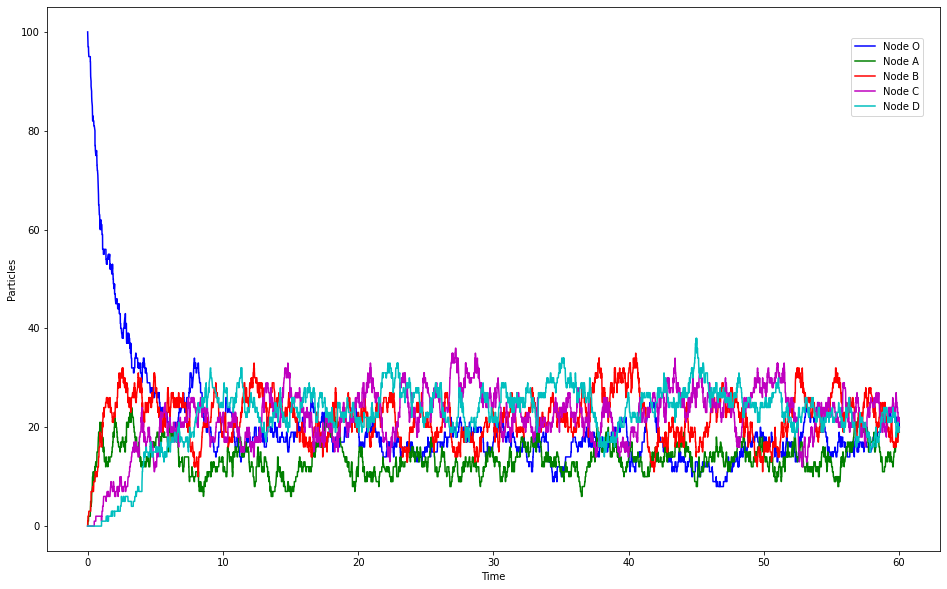

In [ ]:
fig_1, ax = plt.subplots(figsize=(16, 10))
ax.plot(plot_time, particles_in_0, c='b', linestyle='-', label='Node O')
ax.plot(plot_time, particles_in_1, c='g', linestyle='-', label='Node A')
ax.plot(plot_time, particles_in_2, c='r', linestyle='-', label='Node B')
ax.plot(plot_time, particles_in_3, c='m', linestyle='-', label='Node C')
ax.plot(plot_time, particles_in_4, c='c', linestyle='-', label='Node D')
ax.legend(loc=(0.9, 0.8))  # position: 90% of the length, 50% of height
ax.set_xlabel('Time')
ax.set_ylabel('Particles')
plt.show()

---
---

## PROBLEM 3

### PROPORTIONAL RATE

In [ ]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import sys
import random

Lambda = [
[0, 2/3, 1/3, 0, 0],
[0, 0, 1/4, 1/4, 2/4],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 1, 0]]  # modified to avoid singular matrix, if D clicks the particle will be removed anyway

node_dict = {'o':0, 'a':1, 'b':2, 'c':3, 'd':4}

w = np.sum(Lambda, axis=1)
w_star = np.max(w) 
P_BAR = Lambda/w_star 
P_BAR = P_BAR + np.diag(np.ones(len(w))-np.sum(P_BAR,axis=1))

node_0_count = 0
node_1_count = 0
node_2_count = 0
node_3_count = 0
node_4_count = 0

input_poisson_clock_rate = 100
simulation_time_units = 60
elapsed_time = 0
current_nodes = []  # particles in the network, index is the particle, value is the node

# For visualization of last iteration
plot_time = [elapsed_time]
particles_in_0 = [0]
particles_in_1 = [0]
particles_in_2 = [0]
particles_in_3 = [0]
particles_in_4 = [0]

P_BAR_cum = np.cumsum(P_BAR, axis=1)

while elapsed_time < simulation_time_units:

  if len(current_nodes) == 0:  # if no particle in the network, one has to enter first
    input_click_waiting_time = -np.log(np.random.rand())/input_poisson_clock_rate  # Input Poisson Clock click
    current_nodes.append(0)
  else:
    input_click_waiting_time = -np.log(np.random.rand())/input_poisson_clock_rate  # Input Poisson Clock click
    global_click_waiting_time = -np.log(np.random.rand())/len(current_nodes)  # Global Poisson Clock click

    if global_click_waiting_time < input_click_waiting_time:  # then one particle moves
      
      t_next = global_click_waiting_time

      # probabilities based on particles in each node
      node_0_prob = current_nodes.count(0)/len(current_nodes)
      node_1_prob = current_nodes.count(1)/len(current_nodes)
      node_2_prob = current_nodes.count(2)/len(current_nodes)
      node_3_prob = current_nodes.count(3)/len(current_nodes)
      node_4_prob = current_nodes.count(4)/len(current_nodes)

      # node choice and choice of a particle in choosen node
      choosen_node = choice([0, 1, 2, 3, 4], 1, p=[node_0_prob, node_1_prob, node_2_prob, node_3_prob, node_4_prob])[0]  # since choice returns a list
      particles_in_choosen_node = []
      for index in range(0, len(current_nodes)):  # extraction of indices associated to particles in the chosen node
        if current_nodes[index] == choosen_node:
          particles_in_choosen_node.append(index)
      particle = random.choice(particles_in_choosen_node)  # Random particle choice

      # Sending the particle to a new node according to P
      if choosen_node == 4:
        del current_nodes[particle]
      else:
        current_nodes[particle] = np.argwhere(P_BAR_cum[current_nodes[particle]] > np.random.rand())[0][0]  # move to new node

    else:  # Then one particle enters
      t_next = input_click_waiting_time
      current_nodes.append(0)

  # Updating elapsed time
  elapsed_time += t_next

  # For visualization purposes
  plot_time.append(elapsed_time)
  particles_in_0.append(current_nodes.count(0))
  particles_in_1.append(current_nodes.count(1))
  particles_in_2.append(current_nodes.count(2))
  particles_in_3.append(current_nodes.count(3))
  particles_in_4.append(current_nodes.count(4))

node_0_count += current_nodes.count(0)
node_1_count += current_nodes.count(1)
node_2_count += current_nodes.count(2)
node_3_count += current_nodes.count(3)
node_4_count += current_nodes.count(4)

KeyboardInterrupt: ignored

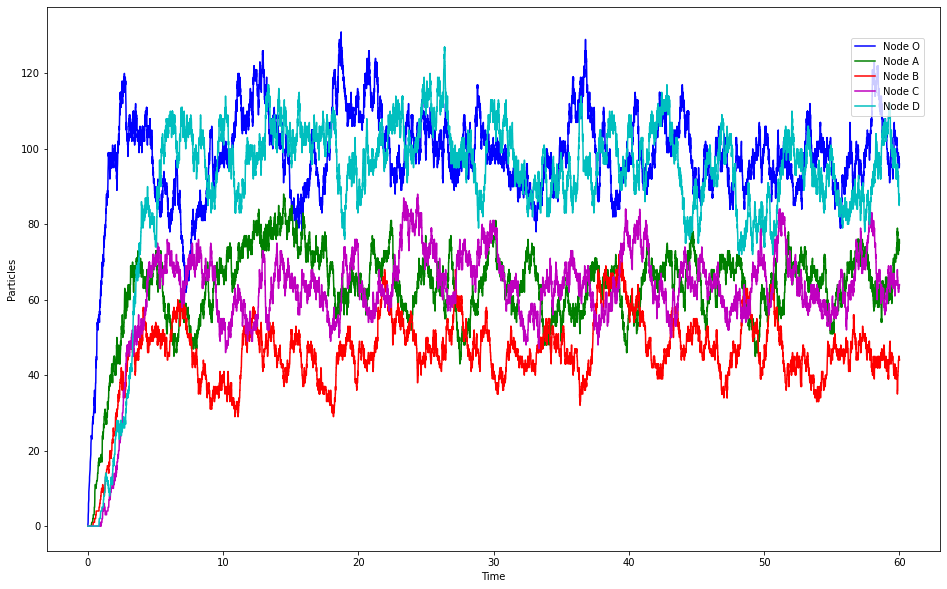

In [ ]:
fig_1, ax = plt.subplots(figsize=(16, 10))
ax.plot(plot_time, particles_in_0, c='b', linestyle='-', label='Node O')
ax.plot(plot_time, particles_in_1, c='g', linestyle='-', label='Node A')
ax.plot(plot_time, particles_in_2, c='r', linestyle='-', label='Node B')
ax.plot(plot_time, particles_in_3, c='m', linestyle='-', label='Node C')
ax.plot(plot_time, particles_in_4, c='c', linestyle='-', label='Node D')
ax.legend(loc=(0.9, 0.8))  # position: 90% of the length, 50% of height
ax.set_xlabel('Time')
ax.set_ylabel('Particles')
plt.show()

### PROPORTIONAL RATE WITH PRECOMPUTED INPUTS

In [ ]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import sys
import random

Lambda = [
[0, 2/3, 1/3, 0, 0],
[0, 0, 1/4, 1/4, 2/4],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 1, 0]]  # modified to avoid singular matrix, if D clicks the particle will be removed anyway

node_dict = {'o':0, 'a':1, 'b':2, 'c':3, 'd':4}

w = np.sum(Lambda, axis=1)
w_star = np.max(w) 
P_BAR = Lambda/w_star 
P_BAR = P_BAR + np.diag(np.ones(len(w))-np.sum(P_BAR,axis=1))

input_poisson_clock_rate = 1
input_times = []  # list of times when to enter a particle
input_index = 0  # index that tracks next time to make a particle entering
simulation_time_units = 60
elapsed_time = 0
current_nodes = []  # particles in the network, index is the particle, value is the node

# For visualization of last iteration
plot_time = [elapsed_time]
particles_in_0 = [0]
particles_in_1 = [0]
particles_in_2 = [0]
particles_in_3 = [0]
particles_in_4 = [0]

P_BAR_cum = np.cumsum(P_BAR, axis=1)

while elapsed_time < simulation_time_units:  # computation of input times
  input_click_waiting_time = -np.log(np.random.rand())/input_poisson_clock_rate  # Input Poisson Clock click
  elapsed_time += input_click_waiting_time
  input_times.append(elapsed_time)

elapsed_time = 0

while elapsed_time < simulation_time_units:
  if len(current_nodes) == 0:  # if no particle in the network, one has to enter first
    elapsed_time += input_times[input_index]  # Updating elapsed time
    input_index += 1
    current_nodes.append(0)
    
    # For visualization purposes
    plot_time.append(elapsed_time)
    particles_in_0.append(current_nodes.count(0))
    particles_in_1.append(current_nodes.count(1))
    particles_in_2.append(current_nodes.count(2))
    particles_in_3.append(current_nodes.count(3))
    particles_in_4.append(current_nodes.count(4))

  else:
    global_click_waiting_time = -np.log(np.random.rand())/len(current_nodes)  # Global Poisson Clock click
    
    while elapsed_time + global_click_waiting_time <= input_times[input_index] and len(current_nodes) != 0:
      elapsed_time += global_click_waiting_time

      # probabilities based on particles in each node
      node_0_prob = current_nodes.count(0)/len(current_nodes)
      node_1_prob = current_nodes.count(1)/len(current_nodes)
      node_2_prob = current_nodes.count(2)/len(current_nodes)
      node_3_prob = current_nodes.count(3)/len(current_nodes)
      node_4_prob = current_nodes.count(4)/len(current_nodes)

      # node choice and choice of a particle in choosen node
      choosen_node = choice([0, 1, 2, 3, 4], 1, p=[node_0_prob, node_1_prob, node_2_prob, node_3_prob, node_4_prob])[0]  # since choice returns a list
      particles_in_choosen_node = []
      for index in range(0, len(current_nodes)):  # extraction of indeces associated to particles in the choosen node
        if current_nodes[index] == choosen_node:
          particles_in_choosen_node.append(index)
      particle = random.choice(particles_in_choosen_node)  # Random particle choice

      # Sending the particle to a new node according to P
      if choosen_node == 4:
        del current_nodes[particle]
      else:
        current_nodes[particle] = np.argwhere(P_BAR_cum[current_nodes[particle]] > np.random.rand())[0][0]  # move to new node

      if len(current_nodes) != 0:
        global_click_waiting_time = -np.log(np.random.rand())/len(current_nodes)  # Global Poisson Clock click

      # For visualization purposes
      plot_time.append(elapsed_time)
      particles_in_0.append(current_nodes.count(0))
      particles_in_1.append(current_nodes.count(1))
      particles_in_2.append(current_nodes.count(2))
      particles_in_3.append(current_nodes.count(3))
      particles_in_4.append(current_nodes.count(4))

    elapsed_time = input_times[input_index]  # now is the turn for a particle to enter
    input_index += 1
    current_nodes.append(0)

    # For visualization purposes
    plot_time.append(elapsed_time)
    particles_in_0.append(current_nodes.count(0))
    particles_in_1.append(current_nodes.count(1))
    particles_in_2.append(current_nodes.count(2))
    particles_in_3.append(current_nodes.count(3))
    particles_in_4.append(current_nodes.count(4))



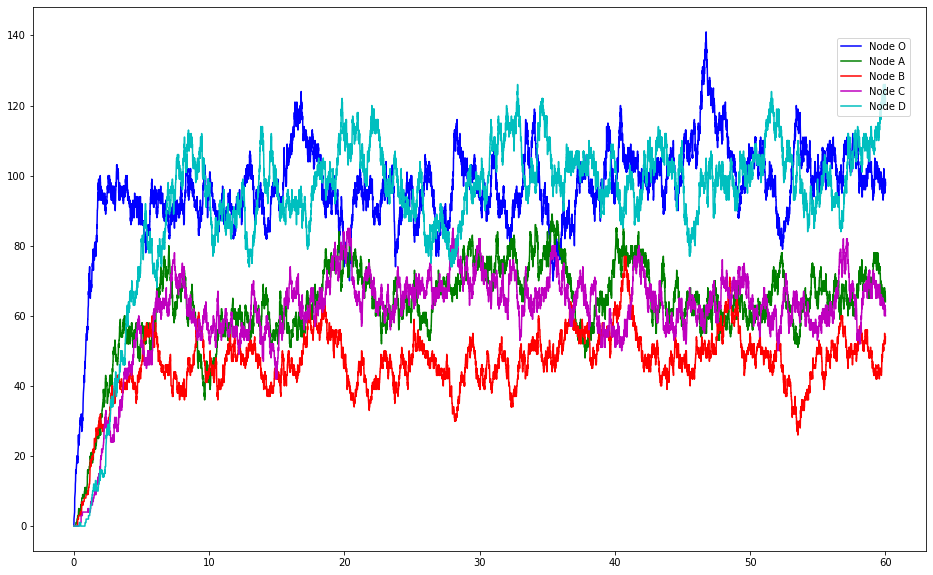

In [ ]:
fig_1, ax = plt.subplots(figsize=(16, 10))
ax.plot(plot_time, particles_in_0, c='b', linestyle='-', label='Node O')
ax.plot(plot_time, particles_in_1, c='g', linestyle='-', label='Node A')
ax.plot(plot_time, particles_in_2, c='r', linestyle='-', label='Node B')
ax.plot(plot_time, particles_in_3, c='m', linestyle='-', label='Node C')
ax.plot(plot_time, particles_in_4, c='c', linestyle='-', label='Node D')
ax.legend(loc=(0.9, 0.8))  # position: 90% of the length, 50% of height
plt.show()

### FIXED RATE

In [ ]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand
import matplotlib.pyplot as plt
import sys
import random

Lambda = [
[0, 2/3, 1/3, 0, 0],
[0, 0, 1/4, 1/4, 2/4],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 1, 0]]  # modified to avoid singular matrix, if D clicks it will the particle will be removed anyway

node_dict = {'o':0, 'a':1, 'b':2, 'c':3, 'd':4}

w = np.sum(Lambda, axis=1)
w_star = np.max(w) 
P_BAR = Lambda/w_star 
P_BAR = P_BAR + np.diag(np.ones(len(w))-np.sum(P_BAR,axis=1))

node_0_count = 0
node_1_count = 0
node_2_count = 0
node_3_count = 0
node_4_count = 0

input_poisson_clock_rate = 0.5
simulation_time_units = 60
elapsed_time = 0
current_nodes = []  # index is the particle, value is the node

# For visualization of last iteration
plot_time = [elapsed_time]
particles_in_0 = [0]
particles_in_1 = [0]
particles_in_2 = [0]
particles_in_3 = [0]
particles_in_4 = [0]

P_BAR_cum = np.cumsum(P_BAR, axis=1)

while elapsed_time < simulation_time_units:

  if len(current_nodes) == 0:  # if no particle in the network, one has to enter first
    input_click_waiting_time = -np.log(np.random.rand())/input_poisson_clock_rate  # Input Poisson Clock click
    current_nodes.append(0)
  else:
    input_click_waiting_time = -np.log(np.random.rand())/input_poisson_clock_rate  # Input Poisson Clock click
    global_click_waiting_time = -np.log(np.random.rand())/len(set(current_nodes))  # Global Poisson Clock click with rate number of nodes with at least a particle

    if input_click_waiting_time < global_click_waiting_time:
      t_next = input_click_waiting_time
      current_nodes.append(0)
    else:
      t_next = global_click_waiting_time

      if len(current_nodes) > 0:  # If there is at least particle in the network

        # node choice and choice of a particle in choosen node
        choosen_node = choice([0, 1, 2, 3, 4], 1)[0]  # since choice returns a list

        if current_nodes.count(choosen_node) > 0:  # if there is a particle it moves, else nothing happens
          particles_in_choosen_node = []
          for index in range(0, len(current_nodes)):  # extraction of indeces associated to particles in the choosen node
            if current_nodes[index] == choosen_node:
              particles_in_choosen_node.append(index)
          particle = random.choice(particles_in_choosen_node)  # Random particle choice in chosen node

          # Sending the particle to a new node according to P
          if choosen_node == 4:
            del current_nodes[particle]
          else:
            current_nodes[particle] = np.argwhere(P_BAR_cum[current_nodes[particle]] > np.random.rand())[0][0]  # move to new node

  # Updating elapsed time
  elapsed_time += t_next

  # For visualization purposes
  plot_time.append(elapsed_time)
  particles_in_0.append(current_nodes.count(0))
  particles_in_1.append(current_nodes.count(1))
  particles_in_2.append(current_nodes.count(2))
  particles_in_3.append(current_nodes.count(3))
  particles_in_4.append(current_nodes.count(4))

node_0_count += current_nodes.count(0)
node_1_count += current_nodes.count(1)
node_2_count += current_nodes.count(2)
node_3_count += current_nodes.count(3)
node_4_count += current_nodes.count(4)

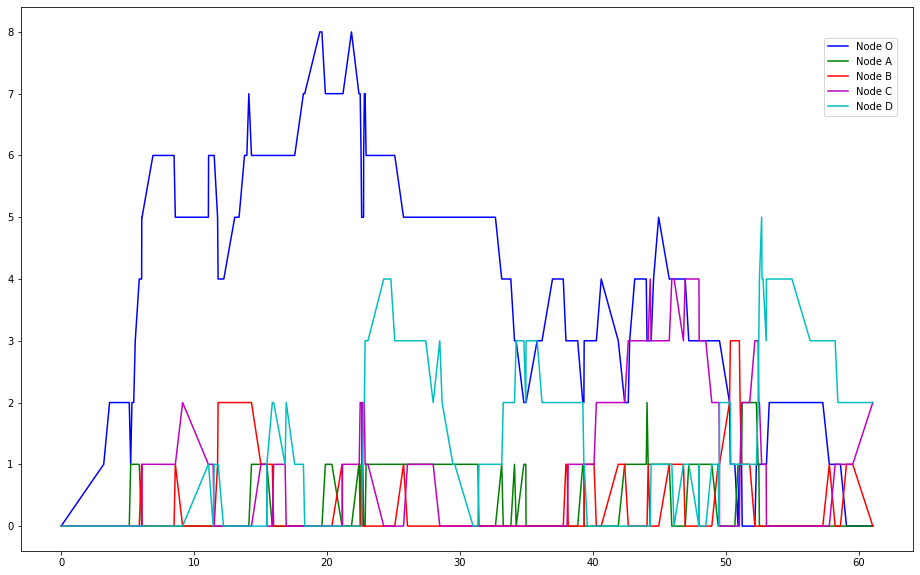

In [ ]:
fig_1, ax = plt.subplots(figsize=(16, 10))
ax.plot(plot_time, particles_in_0, c='b', linestyle='-', label='Node O')
ax.plot(plot_time, particles_in_1, c='g', linestyle='-', label='Node A')
ax.plot(plot_time, particles_in_2, c='r', linestyle='-', label='Node B')
ax.plot(plot_time, particles_in_3, c='m', linestyle='-', label='Node C')
ax.plot(plot_time, particles_in_4, c='c', linestyle='-', label='Node D')
ax.legend(loc=(0.9, 0.8))  # position: 90% of the length, 50% of height
plt.show()